In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
def create_matrix_vector(n):
    A = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(n-1):
        A[0,0]=-2
        A[0,1]=1
        if i>=1:
            A[i,i-1] = 1
            A[i,i] = -2
            A[i,i+1] = 1
    for i in range(n):
        b[i] = ((1/(n+1))**2)*((i+1)**2)
    return A,b

In [23]:
def inverse_tridiagonal(A,b):
    n = len(A)
    x = np.zeros(n)
    for i in range(1,n):
        A[i,i] = A[i,i] - (A[i,i-1]/A[i-1,i-1])*A[i-1,i]
        b[i] = b[i] - (A[i,i-1]/A[i-1,i-1])*b[i-1]
    
    x[n-1] = b[n-1]/A[n-1,n-1]

    for i in range(n-2,1,-1):
        x[i] = (b[i]-A[i,i+1])/A[i,i]

    return x

In [24]:
times = []
sizes = [2**i for i in range(2,16)]
for i in range(len(sizes)):
    size = sizes[i]
    A,b = create_matrix_vector(size)
    start_time = time.time()
    inverse_tridiagonal(A,b)
    end_time = time.time()
    times.append(end_time-start_time)
    print("Size: " + str(size))
    print("Time: " + str(times[i]))

C:\Users\esteb\AppData\Local\Temp\ipykernel_9264\331984369.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  x[n-1] = b[n-1]/A[n-1,n-1]


Size: 4
Time: 0.0
Size: 8
Time: 0.000997304916381836
Size: 16
Time: 0.0
Size: 32
Time: 0.0
Size: 64
Time: 0.0010035037994384766
Size: 128
Time: 0.0010292530059814453
Size: 256
Time: 0.0030002593994140625
Size: 512
Time: 0.001954317092895508
Size: 1024
Time: 0.004967212677001953
Size: 2048
Time: 0.007980108261108398
Size: 4096
Time: 0.02292490005493164
Size: 8192
Time: 0.03687238693237305
Size: 16384
Time: 0.07776403427124023
Size: 32768
Time: 0.1136932373046875


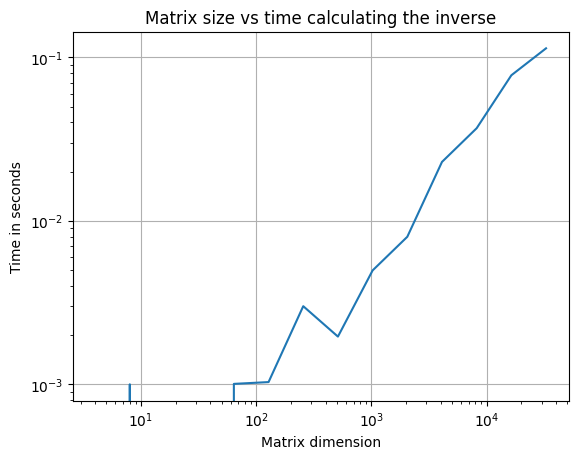

In [25]:
plt.loglog(sizes[:len(times)], times)
plt.xlabel('Matrix dimension')
plt.ylabel('Time in seconds')
plt.title("Matrix size vs time calculating the inverse")
plt.grid(True)
plt.show()